In [1]:
## importing modules and loading the data
import numpy as np
import os
import nibabel as nib
import matplotlib as mlp
import MainFunctions as MF
import bokeh
import bokeh.plotting as bpl
from bokeh.models import ColorBar, BasicTicker, LinearColorMapper
import wav as wav
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import undersampling as us
from bokeh.io import export_png
# downloading the data
path0=os.getcwd()



/Users/alizare/opt/anaconda3/envs/envTF113/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  if sys.path[0] == '':


In [2]:
# download the data if it doesnt exist. 
path=path0+'/content/bold5000/sub-CSI3_anat/sub-CSI3_ses-16_T1w.nii.gz'
downloaded=os.path.isfile(path)
if not downloaded:
    !pip install awscli
    os.chdir(path0)
    os.mkdir('./content')
    os.chdir('./content')
    os.mkdir('./bold5000')
    os.chdir(path0+'/content/bold5000')
    !aws s3 sync --no-sign-request s3://openneuro.org/ds001499/sub-CSI3/ses-16/anat/ ./sub-CSI3_anat/
    os.chdir(path0)
# load the data
data,hdr= MF.load_data()

In [3]:
# looking at a sample slice of the data and studying different p
Nx = data.shape[0]
Ny = data.shape[1]
Nz = data.shape[2]
n = Ny
X = data[Nx//2, :, :];
levels=2
P=[0.1, 0.3 ,0.5, 0.7, 0.9]
er=[]
lambd = 1e-5
eps = 1e-7
itr= 50000
for prob in P:
    bpl.output_notebook()
    MF.imagesc(X, title='MR Image We Will Recover')
    # samples to remove from the k space
    idxs=us.rmvMap_brn(prob, n,n)

    # getting the undersampled pictures:
    wave=wav.gen_wavelet()
    S=wav.DWT(X,wave,levels)# the wavelet of signal
    sz=S.shape[0]
    #dummy, coeff_slices=wav.DWT(np.zeros((sz, sz)), wave, levels)
    #check=wav.iDWT(S, wave,levels, coeff_slices)
    Y = MF.meas_fun(S,idxs,levels)#np.abs(MF.measure_map(S, idxs, wave,levels, coeff_slices)) # takes idwt and does fft and undersamples. so Y is the undersampled pictures
    # out of which we should reconstruct the original picture X.
    #print(np.sum(np.abs(check)-X))

    # Getting the shape of our desired matrix
    [p, q] = Y.shape
    Y_frob = np.linalg.norm(Y, ord='fro')
    Y_scaled = Y / Y_frob
    sigma = np.std(Y_scaled)
    S = np.random.normal(0, sigma, [p, q])
    # Creating an initial guess for S

    # the regularizer
    loss_value, S= MF.loss_prox2(S, Y_scaled, lambd,eps,Y_frob,idxs,levels,itr )

    X_new = np.abs(wav.iDWT(S, wave,levels))

    er.append(np.linalg.norm(X_new - X, ord='fro'))


    bpl.output_notebook()
    MF.imagesc(X_new, title='Reconsgructed MR Image with Sampling Probability='+str(prob))
    plt.figure(figsize=(18,8))
    plt.plot(loss_value[1:])
    plt.title('Reconstruction Error')
    plt.xlabel('itr')
    plt.savefig('construction_error_'+str(prob)+'.png')
    plt.close()



Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

In [4]:
plt.figure(figsize=(18,8))
plt.plot(P, er)
plt.title('Reconstruction Error')
plt.xlabel('Probability of kepping data in fourier space')
plt.savefig('P_vs_Error.png')
plt.close()


In [5]:
# looking at a sample slice of the data and studying different p
Nx = data.shape[0]
Ny = data.shape[1]
Nz = data.shape[2]
n = Ny
X = data[Nx//3, :, :];
levels=2
P=[0.3]
ery=[]
lambd = 1e-5
eps = 1e-7
itr= 100000
for prob in P:
    bpl.output_notebook()
    MF.imagesc(X, title='MR Image We Will Recover')
    # samples to remove from the k space
    idxs=us.rmvMap_brn(prob, n,n)

    # getting the undersampled pictures:
    wave=wav.gen_wavelet()
    S=wav.DWT(X,wave,levels)# the wavelet of signal
    sz=S.shape[0]
    #dummy, coeff_slices=wav.DWT(np.zeros((sz, sz)), wave, levels)
    #check=wav.iDWT(S, wave,levels, coeff_slices)
    Y = MF.meas_fun(S,idxs,levels)#np.abs(MF.measure_map(S, idxs, wave,levels, coeff_slices)) # takes idwt and does fft and undersamples. so Y is the undersampled pictures
    # out of which we should reconstruct the original picture X.
    #print(np.sum(np.abs(check)-X))

    # Getting the shape of our desired matrix
    [p, q] = Y.shape
    Y_frob = np.linalg.norm(Y, ord='fro')
    Y_scaled = Y / Y_frob
    sigma = np.std(Y_scaled)
    S = np.random.normal(0, sigma, [p, q])
    # Creating an initial guess for S

    # the regularizer
    loss_value, S= MF.loss_prox2(S, Y_scaled, lambd,eps,Y_frob,idxs,levels,itr )

    X_new = np.abs(wav.iDWT(S, wave,levels))

    ery.append(np.linalg.norm(X_new - X, ord='fro'))


    bpl.output_notebook()
    MF.imagesc(X_new, title='Reconsgructed MR Image with Sampling Probability='+str(prob))
    plt.figure(figsize=(18,8))
    plt.plot(loss_value[1:])
    plt.title('Reconstruction Error')
    plt.xlabel('itr')
    plt.savefig('construction2_error_'+str(prob)+'.png')
    plt.close()



Loading BokehJS ...

Loading BokehJS ...

In [6]:
print(Ny)

256


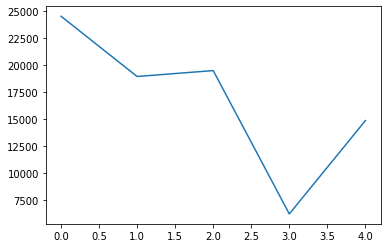

In [7]:
plt.plot(er)